In [19]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
import os

# Download latest version
path = kagglehub.dataset_download("anshtanwar/jellyfish-types")

print("Path to dataset files:", path)

classes=[]
paths=[]
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if not filename.endswith('.txt'):
            classes+=[dirname.split('/')[-1]]
            paths+=[(os.path.join(dirname, filename))]

Path to dataset files: /root/.cache/kagglehub/datasets/anshtanwar/jellyfish-types/versions/16


In [20]:
N=list(range(len(classes)))
class_names=sorted(set(classes))
print(class_names)
normal_mapping=dict(zip(class_names,N))
reverse_mapping=dict(zip(N,class_names))

data=pd.DataFrame(columns=['path','class','label'])
data['path']=paths
data['class']=classes
data['label']=data['class'].map(normal_mapping)
print(len(data))

['Moon_jellyfish', 'barrel_jellyfish', 'blue_jellyfish', 'compass_jellyfish', 'lions_mane_jellyfish', 'mauve_stinger_jellyfish']
1879


In [21]:
# 1. 데이터 기본 정보 확인
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    1879 non-null   object
 1   class   1879 non-null   object
 2   label   1879 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 44.2+ KB
None
             label
count  1879.000000
mean      2.506652
std       1.707539
min       0.000000
25%       1.000000
50%       3.000000
75%       4.000000
max       5.000000


In [30]:
# 2. 랜덤 샘플 출력
print("\nRandom Sample of 5 Rows:")
print(data.sample(5))


Random Sample of 5 Rows:
                                                   path  \
5     /root/.cache/kagglehub/datasets/anshtanwar/jel...   
1676  /root/.cache/kagglehub/datasets/anshtanwar/jel...   
1144  /root/.cache/kagglehub/datasets/anshtanwar/jel...   
1303  /root/.cache/kagglehub/datasets/anshtanwar/jel...   
1425  /root/.cache/kagglehub/datasets/anshtanwar/jel...   

                        class  label  path_length  
5              Moon_jellyfish      0          114  
1676     lions_mane_jellyfish      4          105  
1144  mauve_stinger_jellyfish      5          101  
1303           blue_jellyfish      2           98  
1425           blue_jellyfish      2           92  


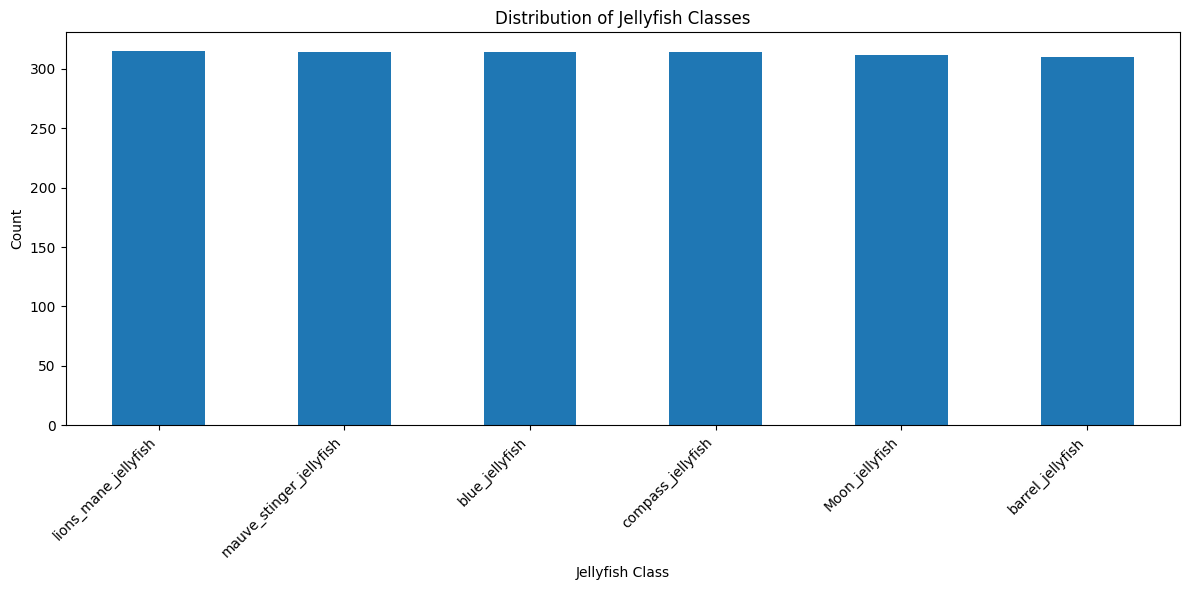

In [22]:
# 3. 클래스 분포 시각화
plt.figure(figsize=(12, 6))
data['class'].value_counts().plot(kind='bar')
plt.title('Distribution of Jellyfish Classes')
plt.xlabel('Jellyfish Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
# 4. 클래스별 이미지 수 출력
class_counts = data['class'].value_counts()
print("Number of images per class:")
print(class_counts)

Number of images per class:
class
lions_mane_jellyfish       315
mauve_stinger_jellyfish    314
blue_jellyfish             314
compass_jellyfish          314
Moon_jellyfish             312
barrel_jellyfish           310
Name: count, dtype: int64


In [28]:
# 5. 클래스와 레이블 매핑 확인
print("\nClass to Label Mapping:")
for class_name, label in normal_mapping.items():
    print(f"{class_name}: {label}")


Class to Label Mapping:
Moon_jellyfish: 0
barrel_jellyfish: 1
blue_jellyfish: 2
compass_jellyfish: 3
lions_mane_jellyfish: 4
mauve_stinger_jellyfish: 5


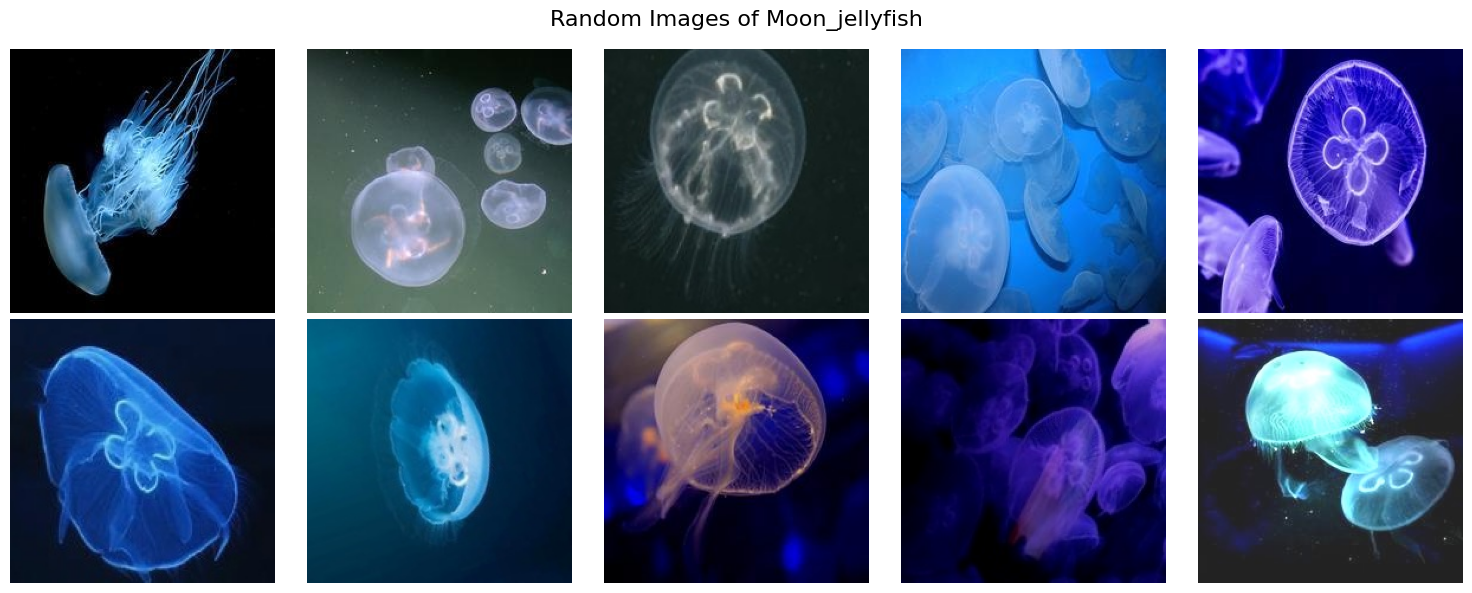

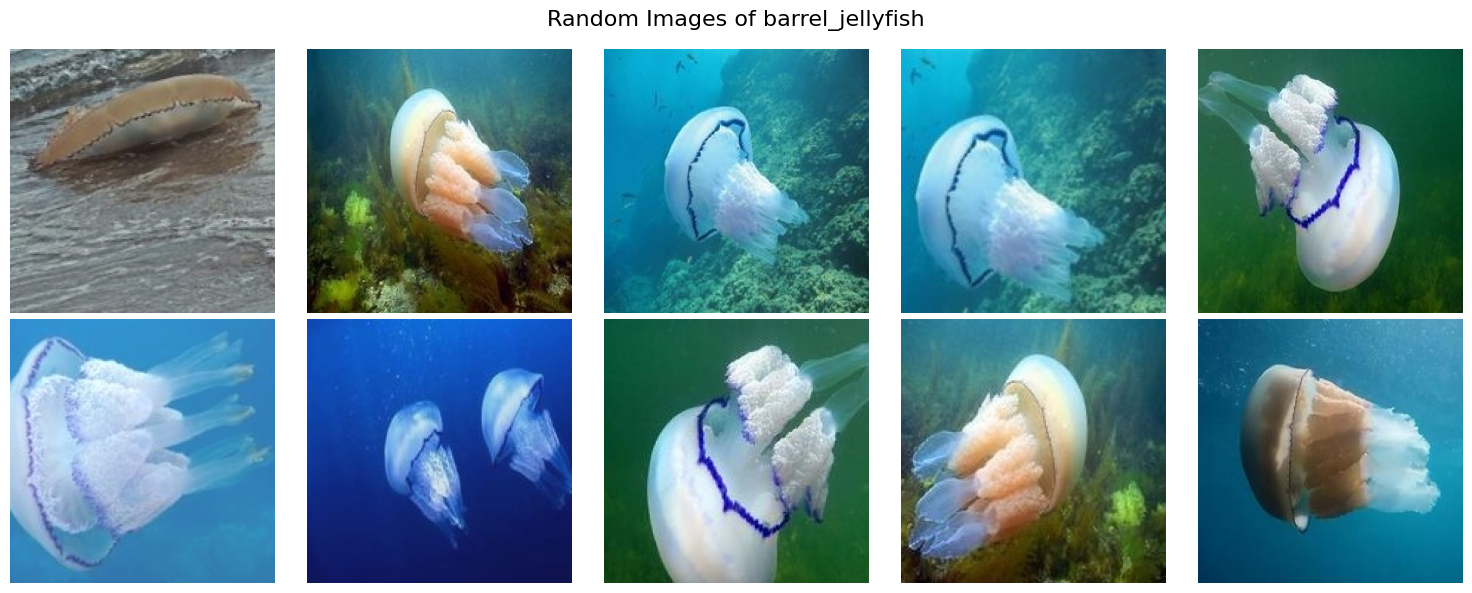

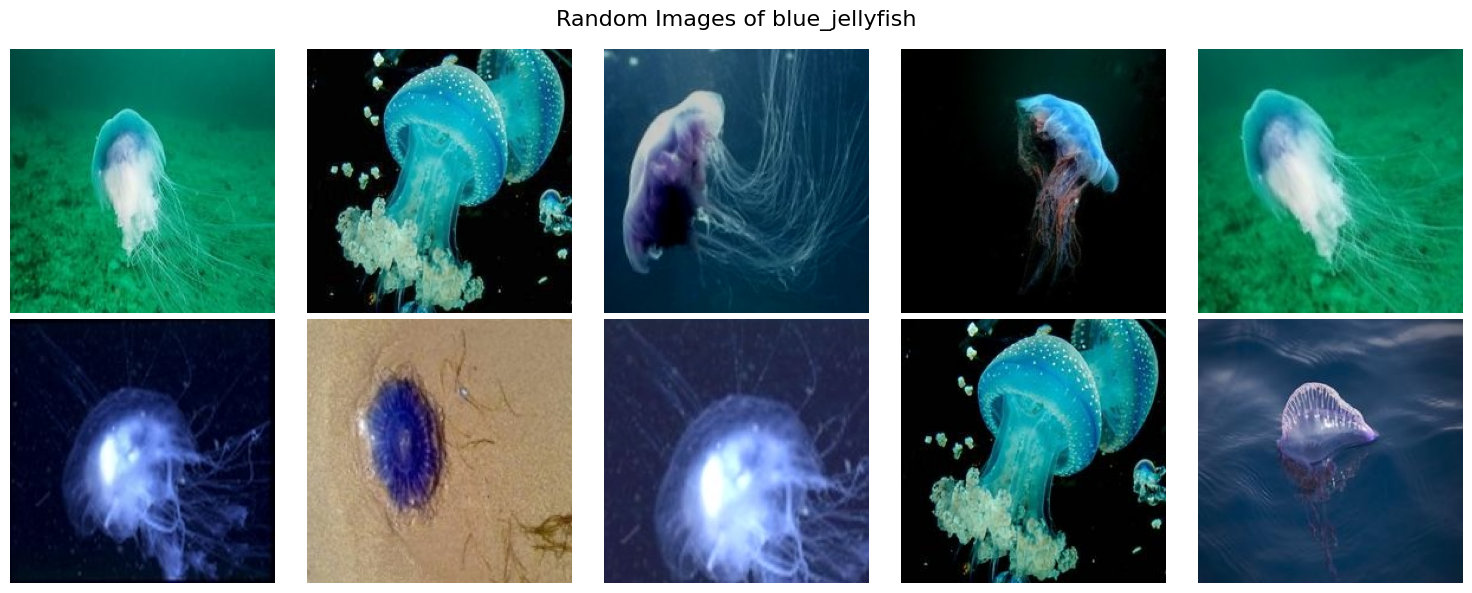

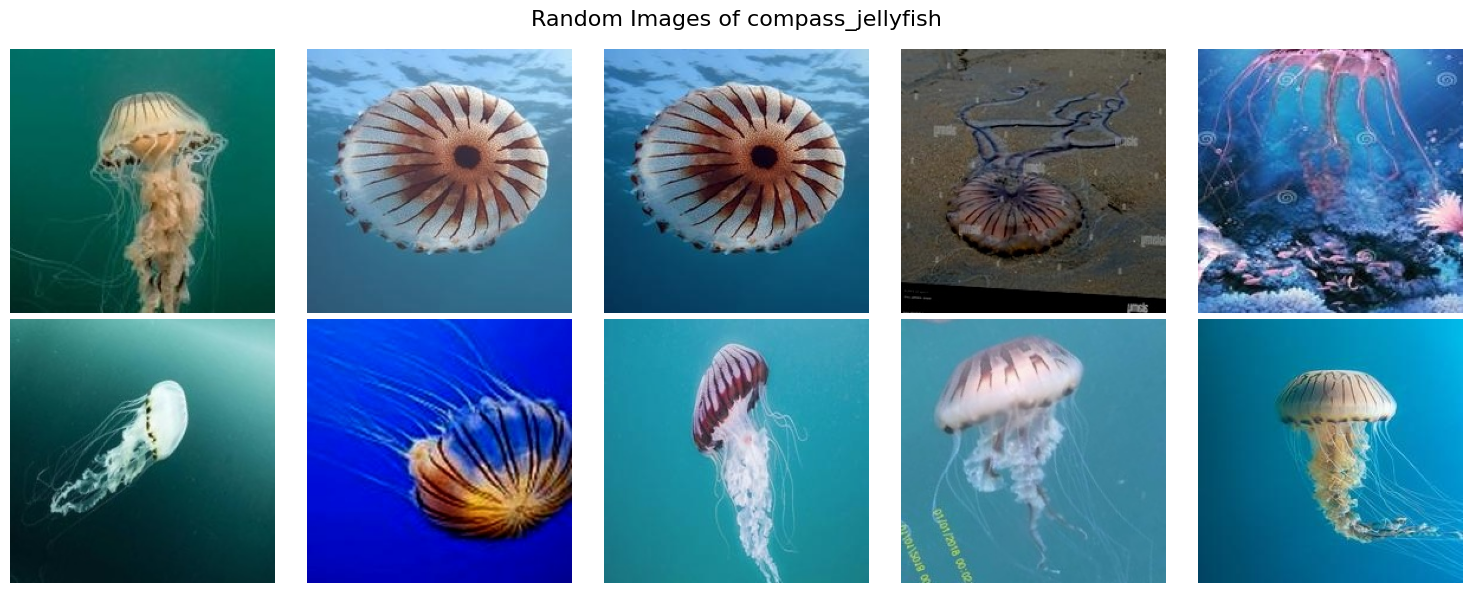

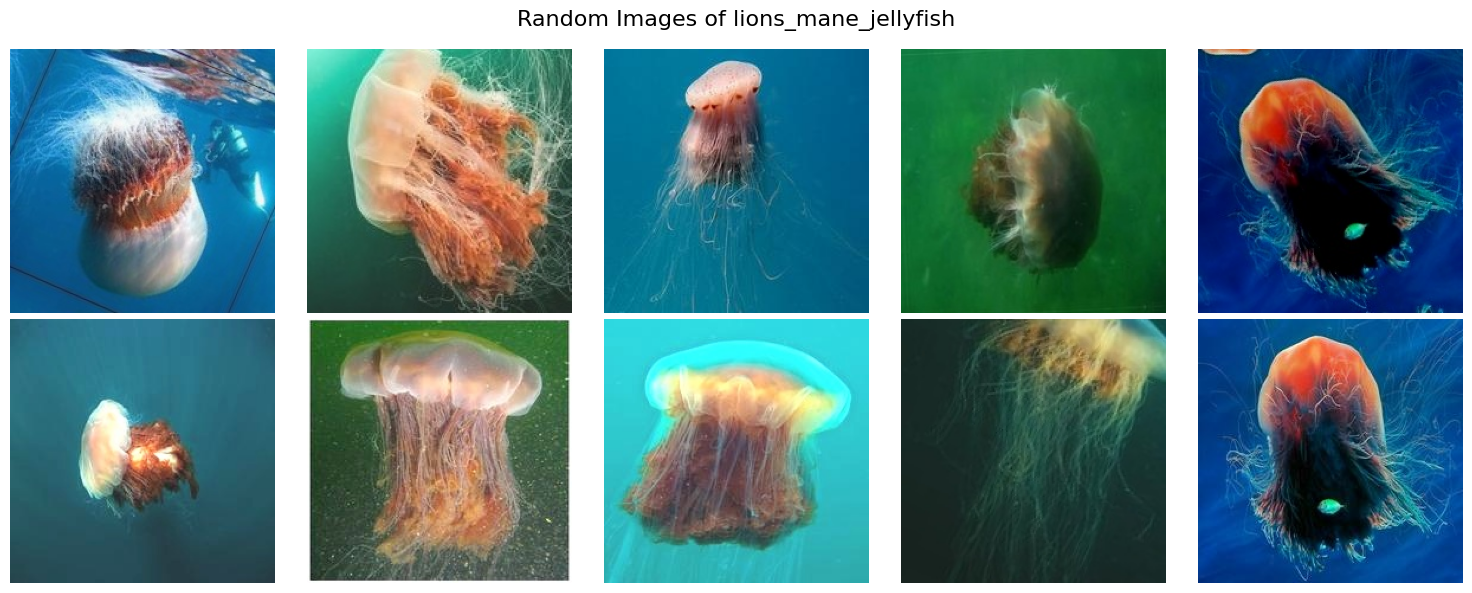

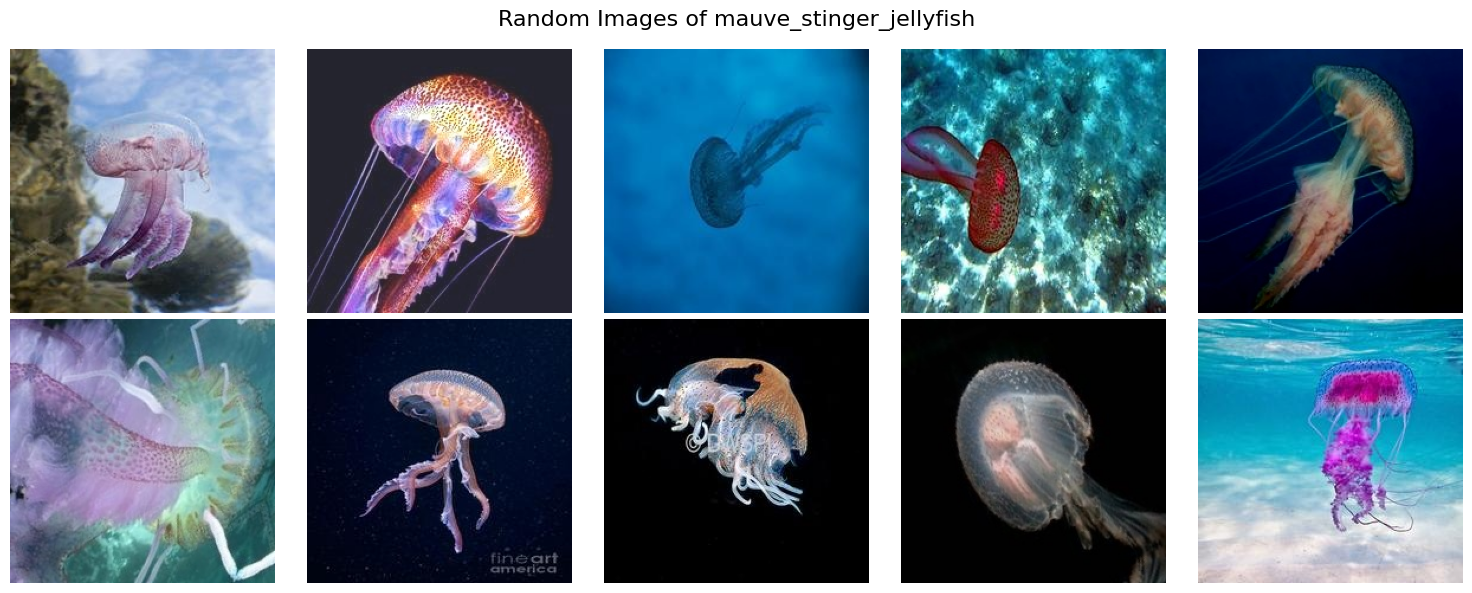

In [24]:
# 6. 각 클래스별 랜덤한 10개 이미지 시각화
def plot_random_images(data, class_name, num_images=10):
    class_images = data[data['class'] == class_name]['path'].tolist()
    selected_images = random.sample(class_images, min(num_images, len(class_images)))

    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle(f'Random Images of {class_name}', fontsize=16)

    for i, ax in enumerate(axes.flat):
        if i < len(selected_images):
            img = Image.open(selected_images[i])
            ax.imshow(img)
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# 각 클래스에 대해 랜덤 이미지 플롯
for class_name in class_names:
    plot_random_images(data, class_name)

# 해파리 이미지 데이터셋 EDA

## 1. 데이터셋 개요

- **총 이미지 수**: 1,879
- **클래스 수**: 6

## 2. 클래스 분포

| 클래스 | 이미지 수 | 비율 |
|--------|-----------|------|
| lions_mane_jellyfish | 315 | 16.76% |
| mauve_stinger_jellyfish | 314 | 16.71% |
| blue_jellyfish | 314 | 16.71% |
| compass_jellyfish | 314 | 16.71% |
| Moon_jellyfish | 312 | 16.60% |
| barrel_jellyfish | 310 | 16.50% |

## 3. 클래스-레이블 매핑

| 클래스 | 레이블 |
|--------|--------|
| Moon_jellyfish | 0 |
| barrel_jellyfish | 1 |
| blue_jellyfish | 2 |
| compass_jellyfish | 3 |
| lions_mane_jellyfish | 4 |
| mauve_stinger_jellyfish | 5 |

## 4. 데이터 라벨링 이슈

### 4.1 해변 사진 문제점
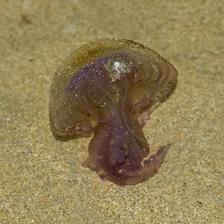
- 해변에서 해파리들의 모양이 비슷해짐
- 해변 색에 맞춰 해파리 색 변형
- 해파리가 눌려 원래 모양 손실

### 4.2 다중 종 포함 이슈
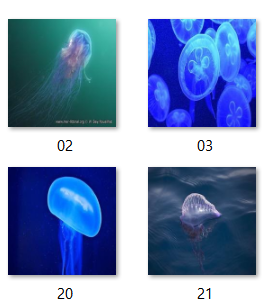

- **주요 문제**: Blue 클래스에 다른 종 해파리 포함
- 한 이미지에 여러 종류의 해파리 존재

### 4.3 데이터 증강 문제
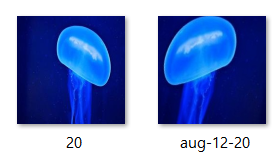
- 데이터셋에 이미 증강된 이미지 존재
- 원본 이미지와 증강 이미지 혼재

### 4.4 부가 요소 포함 이미지
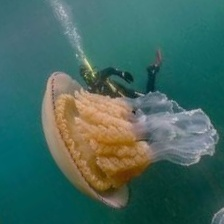
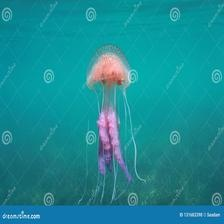
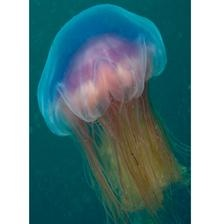
- 워터마크가 있는 이미지
- 텍스트가 포함된 이미지
- 사람이 함께 찍힌 이미지
- 인위적인 흰 배경 이미지

## 5. 데이터 정제 전략

### 5.1 이미지 제거 기준

1. 해변 배경 이미지 제거
2. 다중 종 포함 이미지 제거
3. 증강된 데이터 제거
4. 워터마크/텍스트/사람 포함 이미지 제거

### 5.2 기대 효과

- 데이터셋 품질 향상
- 모델 학습의 정확도 개선
- 해파리 클래스의 순수성 확보

## 6. 향후 계획

- 정제 기준에 따른 이미지 선별
- 제거된 이미지 수와 비율 분석
- 클래스별 이미지 재분포 확인
- 데이터 증강 기법 적용
- 정제된 데이터셋으로 모델 성능 평가

# 해파리 이미지 데이터셋 EDA 결과 (정제 후)

## 1. 데이터셋 개요

- **원본 총 이미지 수**: 1,879
- **정제 후 총 이미지 수**: 502
- **클래스 수**: 6

## 2. 클래스 분포 (정제 후)

| 클래스 | 이미지 수 | 비율 |
|--------|-----------|------|
| compass_jellyfish | 112 | 22.31% |
| barrel_jellyfish | 98 | 19.52% |
| mauve_stinger_jellyfish | 89 | 17.73% |
| lions_mane_jellyfish | 84 | 16.73% |
| Moon_jellyfish | 80 | 15.94% |
| blue_jellyfish | 39 | 7.77% |

## 3. 클래스-레이블 매핑

| 클래스 | 레이블 |
|--------|--------|
| Moon_jellyfish | 0 |
| barrel_jellyfish | 1 |
| blue_jellyfish | 2 |
| compass_jellyfish | 3 |
| lions_mane_jellyfish | 4 |
| mauve_stinger_jellyfish | 5 |

## 4. 데이터 정제 결과

- **제거된 이미지 수**: 1,377 (73.28% 감소)
- **남은 이미지 수**: 502 (26.72% 유지)

### 4.1 클래스별 제거 비율

| 클래스 | 원본 수 | 정제 후 수 | 제거 비율 |
|--------|---------|------------|-----------|
| lions_mane_jellyfish | 315 | 84 | 73.33% |
| mauve_stinger_jellyfish | 314 | 89 | 71.66% |
| blue_jellyfish | 314 | 39 | 87.58% |
| compass_jellyfish | 314 | 112 | 64.33% |
| Moon_jellyfish | 312 | 80 | 74.36% |
| barrel_jellyfish | 310 | 98 | 68.39% |

## 5. 데이터 정제 후 이슈

- **blue_jellyfish 클래스의 심각한 데이터 부족**:
  - 정제 후 39개로 가장 적은 이미지 수 보유
  - 다른 클래스와의 불균형 심화

## 6. 추가 개선 계획

1. **blue_jellyfish 클래스 데이터 보강**:
   - 목표: 80개까지 이미지 수 증가
   - 방법: 추가 데이터 수집 또는 제한적 데이터 증강

2. 클래스 간 균형 조정:
   - 각 클래스별 80-100개 사이의 이미지 수 유지 목표
   - 필요시 추가 데이터 수집 또는 제한적 증강 기법 적용

3. 데이터 품질 재검토:
   - 추가된 이미지에 대해 동일한 정제 기준 적용
   - 전체 데이터셋의 일관성 확보

4. 모델 학습 및 평가:
   - 균형 잡힌 데이터셋으로 모델 재학습
   - 클래스별 성능 평가 및 비교

5. 지속적인 데이터셋 개선:
   - 모델 성능에 따른 추가 데이터 수집 필요성 평가
   - 정기적인 데이터셋 품질 검토 및 업데이트 계획 수립